In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report, accuracy_score

import itertools

# co

In [3]:
training = pd.read_csv('./tdata/co_training.csv')
test = pd.read_csv('./tdata/co_test.csv')
dev = pd.read_csv('./tdata/co_dev.csv')

In [4]:
X_train = training.text.values
y_train = training.label.values

X_test = test.text.values
y_test = test.label.values

X_dev = dev.text.values
y_dev = dev.label.values

In [5]:
vectorizer = CountVectorizer()

def fit_ve(vectorizer, train, test, dev):
    vectorizer.fit(train)
    X_train = vectorizer.transform(train)
    X_test = vectorizer.transform(test)
    X_dev = vectorizer.transform(dev)
        
    return X_train, X_test, X_dev

X_train, X_test, X_dev = fit_ve(vectorizer, X_train, X_test, X_dev)

'''
Rows and Columns in our metrics
'''
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('X_dev: ',X_dev.shape)

'''
Glance to what inside of the metric
The very first row in the training metric

the columns is 8673 which is correct

'''

print(X_train[0].toarray())
print(len(*X_train[0].toarray()))

'''
Convert X_train, X_test, X_dev to dataframe
'''

X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())
X_dev = pd.DataFrame(X_dev.toarray())

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_dev = pd.DataFrame(y_dev)

def printing_Kfold_scores(x_train,y_train):
    fold = KFold(n_splits=5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for train_index, test_index in fold.split(x_train, y_train):


            
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear', max_iter=100000)

            
            lr.fit(x_train.iloc[train_index,:],y_train.iloc[train_index,:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred = lr.predict(x_train.iloc[train_index,:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train.iloc[train_index,:].values,y_pred)
            recall_accs.append(recall_acc)
            print(' recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.iloc[j,results_table.columns.get_loc('Mean recall score')] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


best_c = printing_Kfold_scores(X_train, y_train)

X_train:  (980, 2112)
X_test:  (123, 2112)
X_dev:  (123, 2112)
[[0 0 0 ... 0 0 0]]
2112
-------------------------------------------
C parameter:  0.01
-------------------------------------------

 recall score =  0.0
 recall score =  0.0
 recall score =  0.0
 recall score =  0.0
 recall score =  0.0

Mean recall score  0.0

-------------------------------------------
C parameter:  0.1
-------------------------------------------

 recall score =  0.0
 recall score =  0.0
 recall score =  0.0
 recall score =  0.0
 recall score =  0.0

Mean recall score  0.0

-------------------------------------------
C parameter:  1
-------------------------------------------

 recall score =  0.08108108108108109
 recall score =  0.275
 recall score =  0.3076923076923077
 recall score =  0.13953488372093023
 recall score =  0.12195121951219512

Mean recall score  0.18505189840130282

-------------------------------------------
C parameter:  10
-------------------------------------------

 recall score =

In [6]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Recall metric in the testing dataset:  0.0


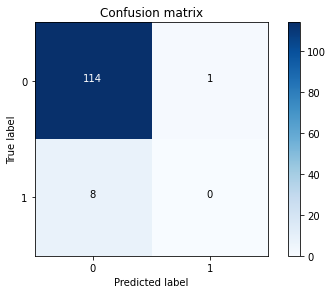

In [8]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [9]:
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

Accuracy: 0.93


# EN

In [13]:
training = pd.read_csv('./tdata/en_training.csv')
test = pd.read_csv('./tdata/en_test.csv')
dev = pd.read_csv('./tdata/en_dev.csv')

In [14]:
X_train = training.text.values
y_train = training.label.values

X_test = test.text.values
y_test = test.label.values

X_dev = dev.text.values
y_dev = dev.label.values

In [15]:
vectorizer = CountVectorizer()

def fit_ve(vectorizer, train, test, dev):
    vectorizer.fit(train)
    X_train = vectorizer.transform(train)
    X_test = vectorizer.transform(test)
    X_dev = vectorizer.transform(dev)
        
    return X_train, X_test, X_dev

X_train, X_test, X_dev = fit_ve(vectorizer, X_train, X_test, X_dev)

'''
Rows and Columns in our metrics
'''
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('X_dev: ',X_dev.shape)

'''
Glance to what inside of the metric
The very first row in the training metric

the columns is 8673 which is correct

'''

print(X_train[0].toarray())
print(len(*X_train[0].toarray()))

'''
Convert X_train, X_test, X_dev to dataframe
'''

X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())
X_dev = pd.DataFrame(X_dev.toarray())

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_dev = pd.DataFrame(y_dev)

def printing_Kfold_scores(x_train,y_train):
    fold = KFold(n_splits=5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for train_index, test_index in fold.split(x_train, y_train):


            
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear', max_iter=100000)

            
            lr.fit(x_train.iloc[train_index,:],y_train.iloc[train_index,:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred = lr.predict(x_train.iloc[train_index,:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train.iloc[train_index,:].values,y_pred)
            recall_accs.append(recall_acc)
            print(' recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.iloc[j,results_table.columns.get_loc('Mean recall score')] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


best_c = printing_Kfold_scores(X_train, y_train)

X_train:  (1679, 2422)
X_test:  (210, 2422)
X_dev:  (210, 2422)
[[0 0 0 ... 0 0 0]]
2422
-------------------------------------------
C parameter:  0.01
-------------------------------------------

 recall score =  0.7239263803680982
 recall score =  0.7067901234567902
 recall score =  0.7295597484276729
 recall score =  0.729483282674772
 recall score =  0.7446808510638298

Mean recall score  0.7268880771982327

-------------------------------------------
C parameter:  0.1
-------------------------------------------

 recall score =  0.7239263803680982
 recall score =  0.7067901234567902
 recall score =  0.7295597484276729
 recall score =  0.729483282674772
 recall score =  0.7446808510638298

Mean recall score  0.7268880771982327

-------------------------------------------
C parameter:  1
-------------------------------------------

 recall score =  0.7944785276073619
 recall score =  0.808641975308642
 recall score =  0.8286163522012578
 recall score =  0.8449848024316109
 recall sc

In [16]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

Recall metric in the testing dataset:  0.8240740740740741


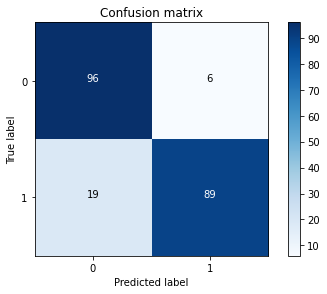

In [17]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [18]:
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

Accuracy: 0.88


# SO

In [19]:
training = pd.read_csv('./tdata/so_training.csv')
test = pd.read_csv('./tdata/so_test.csv')
dev = pd.read_csv('./tdata/so_dev.csv')

In [20]:
X_train = training.text.values
y_train = training.label.values

X_test = test.text.values
y_test = test.label.values

X_dev = dev.text.values
y_dev = dev.label.values

In [21]:
vectorizer = CountVectorizer()

def fit_ve(vectorizer, train, test, dev):
    vectorizer.fit(train)
    X_train = vectorizer.transform(train)
    X_test = vectorizer.transform(test)
    X_dev = vectorizer.transform(dev)
        
    return X_train, X_test, X_dev

X_train, X_test, X_dev = fit_ve(vectorizer, X_train, X_test, X_dev)

'''
Rows and Columns in our metrics
'''
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('X_dev: ',X_dev.shape)

'''
Glance to what inside of the metric
The very first row in the training metric

the columns is 8673 which is correct

'''

print(X_train[0].toarray())
print(len(*X_train[0].toarray()))

'''
Convert X_train, X_test, X_dev to dataframe
'''

X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())
X_dev = pd.DataFrame(X_dev.toarray())

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_dev = pd.DataFrame(y_dev)

def printing_Kfold_scores(x_train,y_train):
    fold = KFold(n_splits=5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for train_index, test_index in fold.split(x_train, y_train):


            
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear', max_iter=100000)

            
            lr.fit(x_train.iloc[train_index,:],y_train.iloc[train_index,:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred = lr.predict(x_train.iloc[train_index,:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train.iloc[train_index,:].values,y_pred)
            recall_accs.append(recall_acc)
            print(' recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.iloc[j,results_table.columns.get_loc('Mean recall score')] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


best_c = printing_Kfold_scores(X_train, y_train)

X_train:  (1655, 6611)
X_test:  (207, 6611)
X_dev:  (207, 6611)
[[0 0 0 ... 0 0 0]]
6611
-------------------------------------------
C parameter:  0.01
-------------------------------------------

 recall score =  0.44933920704845814
 recall score =  0.4538799414348463
 recall score =  0.45203488372093026
 recall score =  0.45441176470588235
 recall score =  0.4470588235294118

Mean recall score  0.4513449240879058

-------------------------------------------
C parameter:  0.1
-------------------------------------------

 recall score =  0.723935389133627
 recall score =  0.7437774524158126
 recall score =  0.751453488372093
 recall score =  0.7485294117647059
 recall score =  0.7455882352941177

Mean recall score  0.7426567953960712

-------------------------------------------
C parameter:  1
-------------------------------------------

 recall score =  0.8590308370044053
 recall score =  0.8799414348462665
 recall score =  0.8808139534883721
 recall score =  0.875
 recall score =  0.

In [22]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1])

Recall metric in the testing dataset:  0.9032258064516129


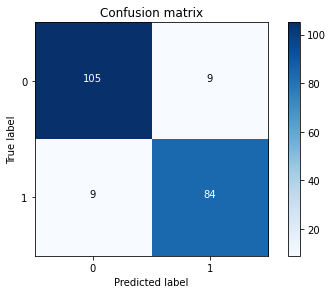

In [23]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [24]:
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

Accuracy: 0.91


#  Random forests

In [25]:
# CO

Accuracy: 0.91
Recall metric in the testing dataset:  0.9032258064516129


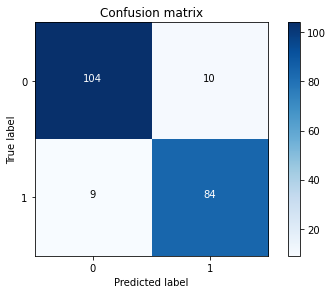

In [26]:
from sklearn.ensemble import RandomForestClassifier

training = pd.read_csv('./tdata/co_training.csv')
test = pd.read_csv('./tdata/co_test.csv')
dev = pd.read_csv('./tdata/co_dev.csv')

forest = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)

forest.fit(X_train, y_train.values.ravel())

Y_pred_RF = forest.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test,Y_pred_RF))

cnf_matrix = confusion_matrix(y_test,Y_pred_RF)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Accuracy: 0.91
Recall metric in the testing dataset:  0.9032258064516129


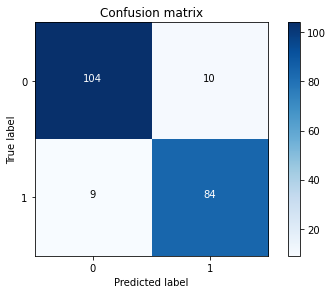

In [27]:
from sklearn.ensemble import RandomForestClassifier

training = pd.read_csv('./tdata/en_training.csv')
test = pd.read_csv('./tdata/en_test.csv')
dev = pd.read_csv('./tdata/en_dev.csv')

forest = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)

forest.fit(X_train, y_train.values.ravel())

Y_pred_RF = forest.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test,Y_pred_RF))

cnf_matrix = confusion_matrix(y_test,Y_pred_RF)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Accuracy: 0.91
Recall metric in the testing dataset:  0.9032258064516129


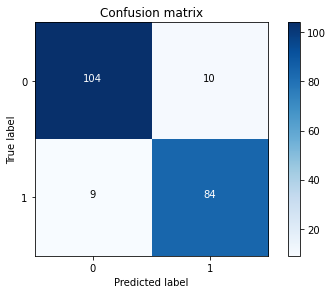

In [28]:
from sklearn.ensemble import RandomForestClassifier

training = pd.read_csv('./tdata/so_training.csv')
test = pd.read_csv('./tdata/so_test.csv')
dev = pd.read_csv('./tdata/so_dev.csv')

forest = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)

forest.fit(X_train, y_train.values.ravel())

Y_pred_RF = forest.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test,Y_pred_RF))

cnf_matrix = confusion_matrix(y_test,Y_pred_RF)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()